In [67]:
import pubchempy as pcp
import py3Dmol
from pandas import DataFrame
from IPython.display import display, HTML
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from dataclasses import dataclass

In [90]:
url = "http://127.0.0.1:8000/organisms/?limit=100&offset=0&name=Achillea%20%25"
import requests

response = requests.get(url)
data = response.json()
organisms = []
for result in data["results"]:
    organisms.append(result["name"])
len(organisms)

64

In [87]:
compounds = {}
for result in data["results"]:
    for compound in result["compounds"]:
        row = {"species": result["name"], **compound}
        compounds[compound["identifier"]] = row

In [92]:
len(compounds)

1439

In [93]:
DataFrame.from_dict(compounds, orient="index").set_index("identifier").sort_values(
    "exact_molecular_weight", ascending=False
).to_excel("compounds.xlsx")

## Show all borneol


In [72]:
url = "http://127.0.0.1:8000/compounds/?limit=10&offset=0&name=(%)-borneol"
response = requests.get(url)
data = response.json()
data["results"][0].keys()

dict_keys(['id', 'identifier', 'canonical_smiles', 'standard_inchi', 'standard_inchi_key', 'name', 'iupac_name', 'annotation_level', 'total_atom_count', 'heavy_atom_count', 'molecular_weight', 'exact_molecular_weight', 'molecular_formula', 'alogp', 'topological_polar_surface_area', 'rotatable_bond_count', 'hydrogen_bond_acceptors', 'hydrogen_bond_donors', 'hydrogen_bond_acceptors_lipinski', 'hydrogen_bond_donors_lipinski', 'lipinski_rule_of_five_violations', 'aromatic_rings_count', 'qed_drug_likeliness', 'formal_charge', 'fractioncsp3', 'number_of_minimal_rings', 'van_der_walls_volume', 'contains_sugar', 'contains_ring_sugars', 'contains_linear_sugars', 'murcko_framework', 'np_likeness', 'chemical_class', 'chemical_sub_class', 'chemical_super_class', 'direct_parent_classification', 'np_classifier_pathway', 'np_classifier_superclass', 'np_classifier_class', 'np_classifier_is_glycoside'])

## All (?)-borneol


### 2D view


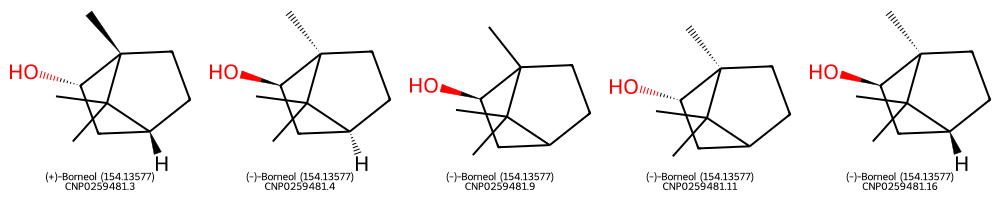

In [84]:
@dataclass
class Molecule:
    identifier: str
    name: str
    canonical_smiles: str
    exact_molecular_weight: float
    inchi: str


molecules: list[Molecule] = []


for entry in data["results"]:
    molecule = Molecule(
        identifier=entry["identifier"],
        name=entry["name"],
        canonical_smiles=entry["canonical_smiles"],
        exact_molecular_weight=entry["exact_molecular_weight"],
        inchi=entry["standard_inchi"],
    )
    molecules.append(molecule)

mols = []
legends = []
for molecule in molecules:
    mol = Chem.MolFromInchi(molecule.inchi)
    if mol:
        AllChem.Compute2DCoords(mol)  # prepare 2D layout
        mols.append(mol)
        legends.append(
            f"{molecule.name} ({molecule.exact_molecular_weight})\n{molecule.identifier}"
        )

# Draw molecules in a grid with labels
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=legends)
img  # In Jupyter Notebook, this will display the image

### 3D view


In [37]:
def show_3d_by_inchi(inchi_key):
    """
    Fetches a compound from PubChem using its InChI Key and displays its 3D structure.

    :param inchi_key: The InChI Key of the compound to fetch.
    """
    # Get the compound from PubChem using the InChI Key
    compounds = pcp.get_compounds(inchi_key, "inchikey")
    if not compounds:
        raise ValueError("Compound not found in PubChem for the provided InChI Key.")

    compound = compounds[0]
    cid = compound.cid  # PubChem Compound ID

    # Load and display the 3D structure using py3Dmol
    view = py3Dmol.view(query=f"cid:{cid}")
    view.setStyle({"stick": {"radius": 0.15}, "sphere": {"scale": 0.2}})
    view.show()

In [60]:
for result in data["results"]:
    inchi_key = result["standard_inchi_key"]
    display(HTML(f"<h2>{result['name']} ({inchi_key})</h2> "))
    display(HTML(f"<b>Identifier:</b> {result['identifier']}"))
    display(HTML(f"<b>Molecular Weight:</b> {result['molecular_weight']}"))

    show_3d_by_inchi(inchi_key)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.